In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.pseudo_decoding.belief_partitions.belief_partition_configs import *
import scripts.pseudo_decoding.belief_partitions.belief_partitions_io as belief_partitions_io

import scipy
import argparse
import copy

In [2]:
# check that splits contain every session for every feature, each subject. 
# load up the feat sessions for sam and blanche
# make sure the splits for that feature has every session

In [3]:
# try to read a splits file, see what it looks like
sa_feats = pd.read_pickle(FEATS_PATH.format(sub="SA"))
bl_feats = pd.read_pickle(FEATS_PATH.format(sub="BL"))


In [4]:
for feat in FEATURES:
    sa_sess = sa_feats[sa_feats.feat == feat].iloc[0].sessions
    bl_sess = bl_feats[bl_feats.feat == feat].iloc[0].sessions
    all_sess = np.concatenate((sa_sess, bl_sess))

    splits = pd.read_pickle(f"/data/patrick_res/choice_reward_int/splits/{feat}_splits.pickle")
    print(f"{feat}: {np.all(np.isin(all_sess, splits.session.unique()))}")



CIRCLE: True
SQUARE: True
STAR: True
TRIANGLE: True
CYAN: True
GREEN: True
MAGENTA: True
YELLOW: True
ESCHER: True
POLKADOT: True
RIPPLE: True
SWIRL: True


In [5]:
def df_load(path):
    acc = np.load(path)
    df = pd.DataFrame(acc).reset_index(names=["Time"])
    df["Time"] = (df["Time"] * 100 + 100 - 1800) / 1000

    df = df.melt(id_vars="Time", value_vars=list(range(acc.shape[1])), var_name="run", value_name="Accuracy")
    return df

In [6]:
# check result of separate models:
separate = df_load("/data/patrick_res/choice_reward_int/both_FeedbackOnsetLong_lateral_prefrontal_cortex_lat_PFC_all_filter_drift_units/STAR_chose_and_correct_choice_reward_separate_accs.npy")
int = df_load("/data/patrick_res/choice_reward_int/both_FeedbackOnsetLong_lateral_prefrontal_cortex_lat_PFC_all_filter_drift_units/STAR_chose_and_correct_test_accs.npy")

<Axes: xlabel='Time', ylabel='Accuracy'>

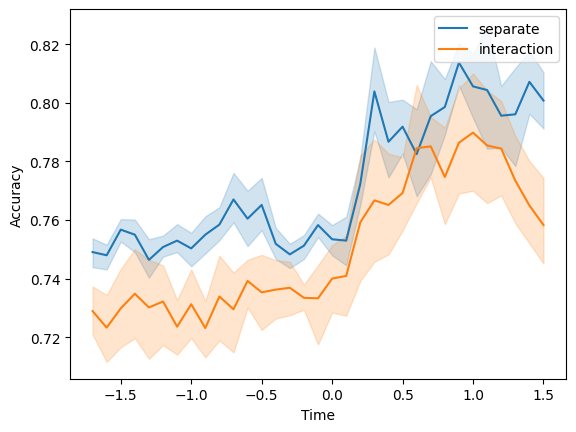

In [7]:
fig, ax = plt.subplots()
sns.lineplot(separate, x="Time", y="Accuracy", ax=ax, label="separate")
sns.lineplot(int, x="Time", y="Accuracy", ax=ax, label="interaction")


In [8]:
separate_updates = df_load("/data/patrick_res/choice_reward_int/both_FeedbackOnsetLong_lateral_prefrontal_cortex_lat_PFC_all_filter_drift_units/STAR_updates_beliefs_choice_reward_separate_accs.npy")


<Axes: xlabel='Time', ylabel='Accuracy'>

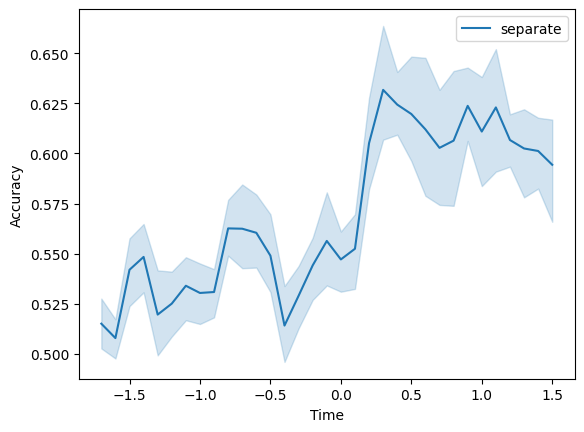

In [10]:
sns.lineplot(separate_updates, x="Time", y="Accuracy", label="separate")
